In [8]:
import os
import torch
import numpy as np
from Bio import PDB

In [9]:
classes = "2.4.1 3.2.2 2.7.10 4.6.1 2.1.1 3.6.4 3.1.4 3.6.5 1.14.13 3.4.21 3.5.1 3.4.19 3.5.2 2.4.2 4.2.1 1.1.1 1.2.1 2.7.11 2.3.1 3.1.3 2.7.1 2.7.4 3.1.1 2.5.1 2.7.7 2.6.1 4.1.1 1.11.1 3.6.1 1.14.14"
classes = classes.split(' ')

In [51]:
data_path = 'outputs/12_layers_rand_flip'

rmsds = []
aar = []
for c in classes:
    try:
        res = torch.load(f'{data_path}/{c}/mask_ratio.pt')
    except:
        continue
    rmsds.extend(torch.tensor(res)[torch.where(~torch.tensor(res).isnan())[0]])
    res = torch.load(f'{data_path}/{c}/aar.pt')
    aar.extend(torch.tensor(res)[torch.where(~torch.tensor(res).isnan())[0]])
(np.mean(rmsds), np.mean(aar))

(0.47150663, 0.23544192)

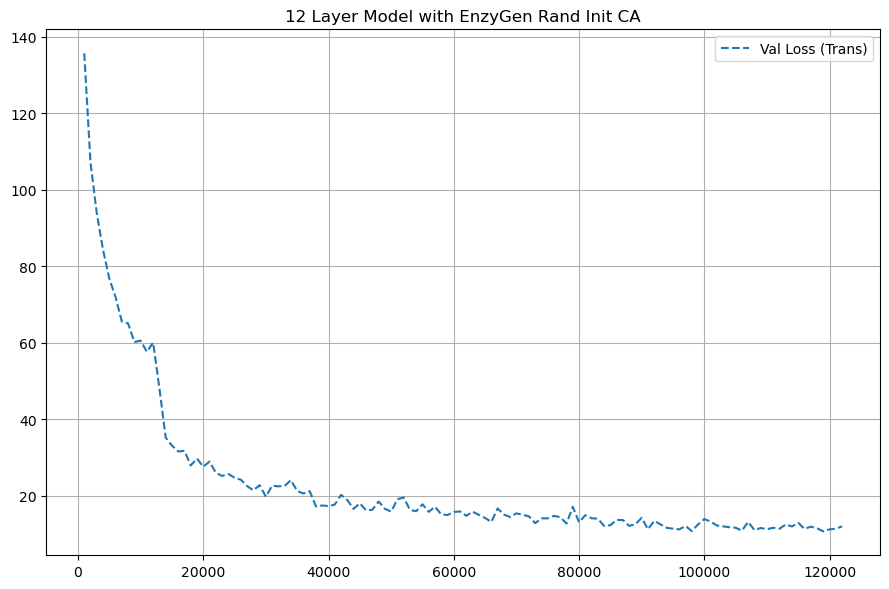

In [50]:
import matplotlib.pyplot as plt
import re

with open('/home/ubuntu/bindprot_design/logs_diffusion_full/pretrain/ablation_interpolation/log.txt', 'r') as f:
    log_data = f.read()

# Extract data
iterations = []
train_loss = []
train_loss_rot = []
train_loss_trans = []
train_loss_chi = []
train_loss_aa = []

train_pattern = r"Iter (\d+) \| loss ([\d.]+) \| loss\(loss_rot\) ([\d.]+) \| loss\(loss_trans\) ([\d.]+) \| loss\(loss_chi\) ([\d.]+) \| loss\(loss_aa\) ([\d.]+)"
val_pattern = r"\[val\] Iter (\d+) \| loss ([\d.]+) \| loss\(loss_rot\) ([\d.]+) \| loss\(loss_trans\) ([\d.]+) \| loss\(loss_chi\) ([\d.]+) \| loss\(loss_aa\) ([\d.]+)"

# Parse training data
for match in re.finditer(train_pattern, log_data):
    iterations.append(int(match.group(1)))
    train_loss.append(float(match.group(2)))
    train_loss_rot.append(float(match.group(3)))
    train_loss_trans.append(float(match.group(4)))
    train_loss_chi.append(float(match.group(5)))
    train_loss_aa.append(float(match.group(6)))

# Parse validation data
val_iterations = []
val_losses = []
val_loss_rot = []
val_loss_trans = []
val_loss_chi = []
val_loss_aa = []
for match in re.finditer(val_pattern, log_data):
    val_iterations.append(int(match.group(1)))
    val_losses.append(float(match.group(2)))
    val_loss_rot.append(float(match.group(3)))
    val_loss_trans.append(float(match.group(4)))
    val_loss_chi.append(float(match.group(5)))
    val_loss_aa.append(float(match.group(6)))

fig = plt.figure(figsize=(9, 6))
plt.plot(val_iterations, val_loss_trans, label="Val Loss (Trans)", linestyle="--")
# plt.plot(iterations, train_loss_rot, label="Train Loss (Rot)", linestyle="--")
# plt.plot(iterations, train_loss_trans, label="Train Loss (Trans)", linestyle="--")
# plt.plot(iterations, train_loss_chi, label="Train Loss (Chi)", linestyle="--")
# plt.plot(iterations, train_loss_aa, label="Train Loss (AA)", linestyle="--")
# plt.scatter(val_iterations, val_losses, label="Validation Loss", color="red", zorder=5)
plt.grid(True)
plt.title("12 Layer Model with EnzyGen Rand Init CA")
plt.legend()
fig.tight_layout()
plt.show()

# # Plot each type of loss separately with train and validation losses
# fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# # Train vs Validation Loss
# axs[0, 0].plot(iterations, train_loss, label="Train Loss", marker="o")
# axs[0, 0].scatter(val_iterations, val_losses, label="Validation Loss", color="red", zorder=5)
# axs[0, 0].set_title("Overall Loss")
# axs[0, 0].set_xlabel("Iterations")
# axs[0, 0].set_ylabel("Loss")
# axs[0, 0].legend()
# axs[0, 0].grid(True)

# # Loss (Rot)
# axs[0, 1].plot(iterations, train_loss_rot, label="Train Loss (Rot)", marker="o", linestyle="--")
# axs[0, 1].scatter(val_iterations, val_loss_rot, label="Validation Loss (Rot)", color="red", zorder=5)
# axs[0, 1].set_title("Rotation Loss")
# axs[0, 1].set_xlabel("Iterations")
# axs[0, 1].set_ylabel("Loss")
# axs[0, 1].legend()
# axs[0, 1].grid(True)

# # Loss (Trans)
# axs[1, 0].plot(iterations, train_loss_trans, label="Train Loss (Trans)", marker="o", linestyle="--")
# axs[1, 0].scatter(val_iterations, val_loss_trans, label="Validation Loss (Trans)", color="red", zorder=5)
# axs[1, 0].set_title("Translation Loss")
# axs[1, 0].set_xlabel("Iterations")
# axs[1, 0].set_ylabel("Loss")
# axs[1, 0].legend()
# axs[1, 0].grid(True)

# # Loss (Chi)
# axs[1, 1].plot(iterations, train_loss_chi, label="Train Loss (Chi)", marker="o", linestyle="--")
# axs[1, 1].scatter(val_iterations, val_loss_chi, label="Validation Loss (Chi)", color="red", zorder=5)
# axs[1, 1].set_title("Chi Loss")
# axs[1, 1].set_xlabel("Iterations")
# axs[1, 1].set_ylabel("Loss")
# axs[1, 1].legend()
# axs[1, 1].grid(True)

# # Loss (AA)
# axs[2, 0].plot(iterations, train_loss_aa, label="Train Loss (AA)", marker="o", linestyle="--")
# axs[2, 0].scatter(val_iterations, val_loss_aa, label="Validation Loss (AA)", color="red", zorder=5)
# axs[2, 0].set_title("Amino Acid Loss")
# axs[2, 0].set_xlabel("Iterations")
# axs[2, 0].set_ylabel("Loss")
# axs[2, 0].legend()
# axs[2, 0].grid(True)

# # Adjust layout and remove the empty subplot
# fig.delaxes(axs[2, 1])
# fig.tight_layout()

# plt.show()


In [36]:
import json
data = json.load(open('data/enzyme_substrate_data_lucky_best_rm_all_mask.json', 'r'))
# rm_pdbs = torch.load('rm_pdb.pt')

In [35]:
rm_pdbs = ['1JAF.A', '1JAF.B', '3B42.B', '6KLS.A', '4HI4.C', '4K8F.C', '4K8F.B', '3VNW.A', '1C52.A', '7E99.A', 
           '8GZ3.A', '3VOL.A', '7MHY.B', '6X0Q.A', '4HI4.B', '3B42.A', '4RLR.A', '4K8F.A', '7U8G.B', '4HI4.A', 
           '6KLV.A', '3RTL.C', '3RTL.B', '3RTL.A', '6LUM.A']
new_data = {}
for c, prots in data.items():
    rm_ids = []
    for i, p in enumerate(prots['train']['pdb']):
        p = p.strip()
        if p.upper() in rm_pdbs or p in rm_pdbs:
            rm_ids.append(i)

    new_prots = {}
    for k, v in prots['train'].items():
        new_v = []
        for i in range(len(v)):
            if i not in rm_ids:
                new_v.append(v[i])
        new_prots[k] = new_v
    
    new_data[c] = {
        'train': new_prots
    }

    if 'valid' in prots:
        new_data[c]['valid'] = prots['valid']

    if 'test' in prots:
        new_data[c]['test'] = prots['test']
        
    # for i in np.sort(rm_ids)[::-1]:
    #     print(c, prots['train']['pdb'][i])
    #     removed += 1
    #     for k in prots['train'].keys():
    #         del(prots['train'][k][i])

In [36]:
with open('data/enzyme_substrate_data_lucky_best_rm_all_mask.json', 'w') as f:
    f.write(json.dumps(new_data))